## 0. Required Packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

## 1. OLS
### Fitting

In [2]:
# import data
data = pd.read_csv('./data/week1.csv', index_col= 0)
data

,경상수지_lag,상품수지_lag,서비스수지_lag,본원소득수지_lag,이전소득수지_lag,자본수지_lag,자본이전_lag,비생산비금융자산_lag,금융계정_lag,직접투자_lag,증권투자_lag,파생금융상품_lag,기타투자_lag,준비자산_lag,외국인보유비율변화
2018/01,4486.5,7915.5,-3707.4,1123.7,-845.3,-31.1,-14.9,-16.2,-6524.9,82.8,-12072.0,1451.9,4776.6,-764.2,0.357013
2018/02,2556.9,7338.0,-4654.4,1543.5,-1670.2,-6.1,2.3,-8.4,-4640.5,-885.9,-3516.5,1310.9,-104.9,-1444.1,0.060606
2018/03,3226.7,4793.3,-2723.5,1553.1,-396.2,-13.3,-6.6,-6.7,-3635.3,-253.1,-9867.3,888.1,5756.7,-159.7,-3.690714
2018/04,5210.4,9216.5,-2314.0,-1008.4,-683.7,1.7,5.7,-4.0,-5341.4,-1923.4,-399.2,1497.1,-3328.1,-1187.8,-0.243810
2018/05,1490.4,9402.2,-1970.1,-5269.2,-672.5,47.7,-0.5,48.2,-37.2,-2189.0,-4070.4,749.3,8591.9,-3119.0,0.329690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/08,4113.9,4427.5,-2572.1,3356.3,-1097.8,-32.1,-0.2,-31.9,-3677.0,-1036.9,-4274.2,293.6,-125.7,1466.2,0.638420
2023/09,5412.7,5201.4,-1549.5,1879.0,-118.2,-26.5,3.0,-29.5,-6286.7,-2112.9,-4246.9,328.8,-1847.5,1591.8,0.251555
2023/10,6072.7,7486.3,-3209.9,2180.4,-384.1,23.7,25.6,-1.9,-4370.2,-2071.5,-5131.1,-665.3,2262.2,1235.5,-0.162105
2023/11,7437.8,5433.3,-1279.8,3358.5,-74.2,44.0,45.9,-1.9,-8773.7,-171.3,-4400.9,-430.0,-3812.2,40.7,-0.730813


In [3]:
# fit ols
ols_result = smf.ols(formula = '외국인보유비율변화 ~ 상품수지_lag + 서비스수지_lag + 증권투자_lag', data = data).fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:              외국인보유비율변화   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.2116
Date:                Sat, 23 Mar 2024   Prob (F-statistic):              0.888
Time:                        20:22:30   Log-Likelihood:                -70.471
No. Observations:                  72   AIC:                             148.9
Df Residuals:                      68   BIC:                             158.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0279      0.168      0.166      0.8

### Testing Complicated Hypothesis

In [4]:
# case 1
from scipy import stats

covmat = ols_result.cov_params() # covariance matrix
C = np.zeros(4); C[1] = 1; C[2] = -1 # make C
Tcse = np.matmul(np.matmul(C, covmat), C.transpose()) # variance
betadiff = np.matmul(C, ols_result.params) # \hat{\beta_1} - \hat{\beta_2}
TC = betadiff / np.sqrt(Tcse) # t statistic
1 - stats.t.cdf(df = 68, x = TC) # p-value

0.6635060480852502

In [5]:
# case 2
# test \beta_1 - \beta_2 = 0, \beta_3 = 0
# corresponding C is 
'''
0 1 -1 0
0 0  0 1
'''
# test C\beta = (\beta_1 - \beta_2, \beta_3) = (0, 0)

C = np.array([[0, 1, -1, 0], [0, 0, 0, 1]])
print(ols_result.f_test(C))

<F test: F=0.0903177281595697, p=0.9137502630832091, df_denom=68, df_num=2>


In [6]:
# case 3
print(ols_result.f_test('(상품수지_lag = 0), (서비스수지_lag = 0)'))

<F test: F=0.31025501064939465, p=0.734292372322748, df_denom=68, df_num=2>


## 2. Regression Diagnostics

### Linearity

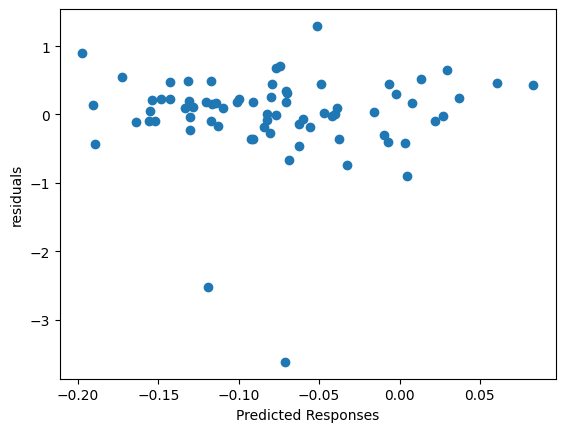

In [7]:
residuals = ols_result.resid
fittedy = ols_result.predict()
plt.scatter(fittedy, residuals)
plt.xlabel('Predicted Responses')
plt.ylabel('residuals')
plt.show()

In [8]:
sm.stats.diagnostic.linear_harvey_collier(ols_result)
sm.stats.diagnostic.linear_rainbow(ols_result) #(fstat, pvalue) 형태
sm.stats.diagnostic.linear_reset(ols_result)

from patsy import dmatrices
y, X = dmatrices('외국인보유비율변화 ~ 상품수지_lag + 서비스수지_lag + 증권투자_lag', data=data, return_type='dataframe')
sm.stats.diagnostic.linear_lm(ols_result.resid, X)

(3.8207661547571865,
 0.2814799010087104,
 <class 'statsmodels.stats.contrast.ContrastResults'>
 <F test: F=1.214200600644942, p=0.3116493053448261, df_denom=65, df_num=3>)

### Normality

c:\Users\kwonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kwonk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


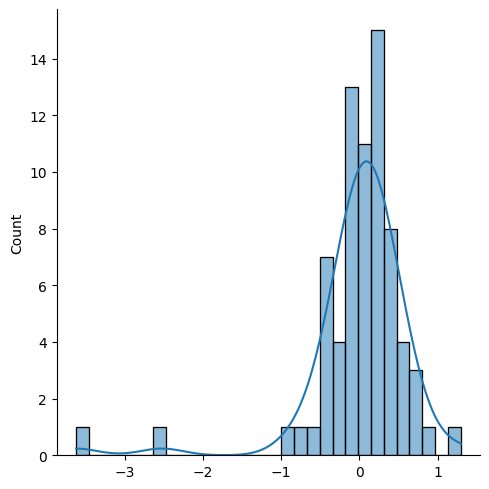

In [9]:
sns.displot(x = ols_result.resid, bins = 30, kde = True)

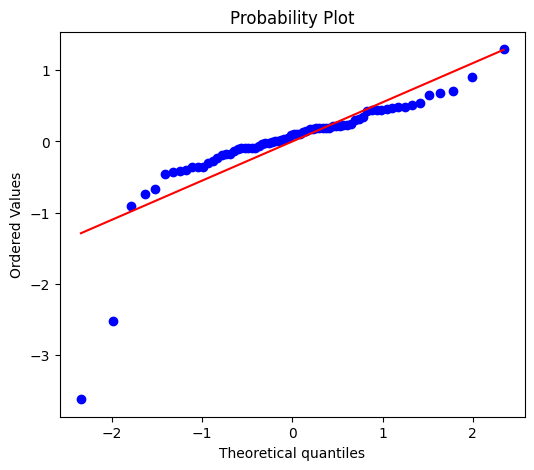

In [10]:
plt.figure(figsize = (6, 5))
stats.probplot(ols_result.resid, dist = stats.norm, plot = plt)
plt.show()

In [11]:
sm.stats.omni_normtest(ols_result.resid)
sm.stats.jarque_bera(ols_result.resid) # (value, pvalue, skew, kurtosis)
sm.stats.diagnostic.kstest_normal(ols_result.resid) # (value, pvalue)
sm.stats.diagnostic.lilliefors(ols_result.resid) # (value, pvalue)
sm.stats.normal_ad(ols_result.resid) # (value, pvalue)

(4.504264378331214, 2.7562324969594994e-11)

### Independency

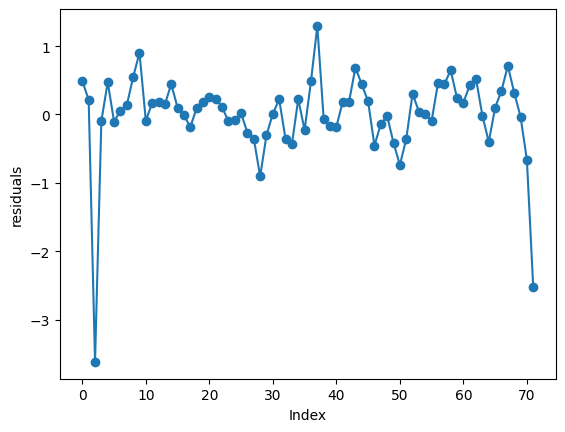

In [12]:
residuals = ols_result.resid
index = range(len(residuals))
plt.plot(index, residuals)
plt.scatter(index, residuals)
plt.xlabel('Index')
plt.ylabel('residuals')
plt.show()

In [13]:
sm.stats.durbin_watson(residuals)

1.4109115534738934

In [14]:
sm.stats.acorr_ljungbox(residuals) # lag, stat, and p-value
sm.stats.acorr_breusch_godfrey(ols_result) # lm value, lm-pvalue, fvalue, f-pvalue
sm.stats.acorr_lm(residuals) # lm value, lm-pvalue, fvalue, f-pvalue

(17.77959938572752,
 0.05879726108860185,
 2.0505458025620866,
 0.046734553021453365)

### Leverage, Influence, and Outliers

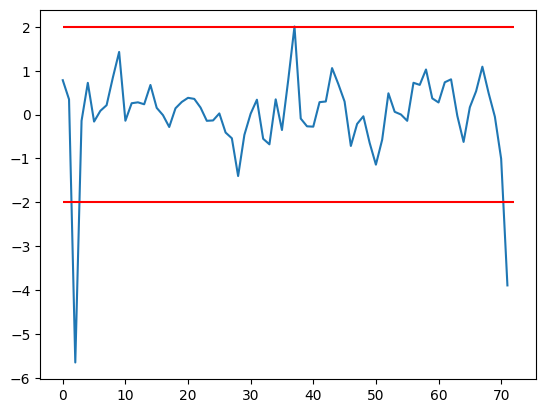

In [15]:
# standardized residuals
influence = ols_result.get_influence()
stud_resid = influence.resid_studentized_internal # (array([ 2, 37, 71], dtype=int64),)
np.where(abs(stud_resid)>2)
plt.plot(stud_resid)
plt.hlines(y = 2, xmin = 0, xmax = 72, color = "red")
plt.hlines(y = -2, xmin = 0, xmax = 72, color = "red")

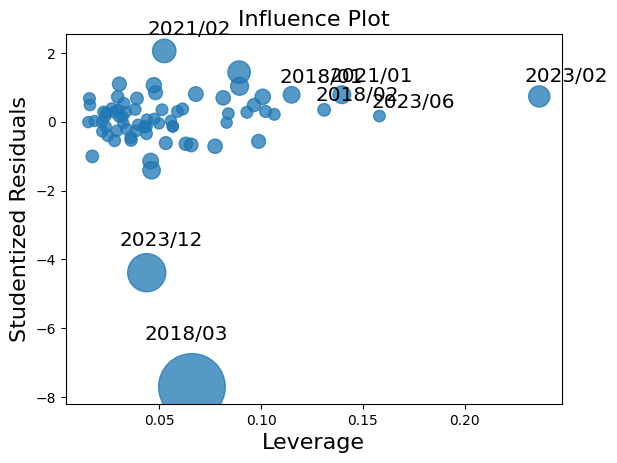

In [16]:
# leverage
leverage = influence.hat_matrix_diag
sm.graphics.influence_plot(ols_result)
plt.show()

In [17]:
stud_resid

array([ 7.83917039e-01,  3.47567147e-01, -5.65187670e+00, -1.41533881e-01,
        7.23306670e-01, -1.59030004e-01,  8.47143404e-02,  2.14033734e-01,
        8.45076489e-01,  1.42757734e+00, -1.40271712e-01,  2.58620263e-01,
        2.79429762e-01,  2.35299898e-01,  6.75047376e-01,  1.53318399e-01,
       -1.26389629e-02, -2.82849886e-01,  1.43507340e-01,  2.87701977e-01,
        3.82105960e-01,  3.57826870e-01,  1.59949861e-01, -1.42115545e-01,
       -1.33530739e-01,  2.65172350e-02, -4.09506974e-01, -5.40360330e-01,
       -1.40072007e+00, -4.62762996e-01,  2.00130114e-02,  3.39068197e-01,
       -5.51466562e-01, -6.78420114e-01,  3.47825534e-01, -3.51153555e-01,
        7.85830397e-01,  2.00880700e+00, -9.08950918e-02, -2.67538483e-01,
       -2.75133461e-01,  2.83466523e-01,  2.98556654e-01,  1.05985992e+00,
        6.96006859e-01,  2.96904169e-01, -7.15291290e-01, -2.13093025e-01,
       -3.88088281e-02, -6.44641308e-01, -1.14165203e+00, -5.73891483e-01,
        4.85416622e-01,  

In [18]:
influence.summary_frame()

,dfb_Intercept,dfb_상품수지_lag,dfb_서비스수지_lag,dfb_증권투자_lag,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
2018/01,-0.114468,-0.004906,-0.170910,-0.171540,0.019954,0.783917,0.114953,0.282519,0.781672,0.281709
2018/02,-0.065820,0.009170,-0.124968,0.011683,0.004551,0.347567,0.130952,0.134919,0.345309,0.134042
2018/03,0.131194,0.652290,0.893240,1.466649,0.564037,-5.651877,0.065969,-1.502048,-7.704413,-2.047531
2018/04,0.008544,-0.018308,0.011978,-0.014665,0.000223,-0.141534,0.042669,-0.029880,-0.140510,-0.029664
2018/05,-0.033074,0.081771,-0.024847,0.000192,0.003974,0.723307,0.029486,0.126075,0.720747,0.125629
...,...,...,...,...,...,...,...,...,...,...
2023/08,0.006809,-0.060309,-0.125557,-0.041895,0.009319,1.091915,0.030316,0.193067,1.093485,0.193345
2023/09,0.027986,-0.009778,0.000868,-0.021226,0.000963,0.488969,0.015857,0.062067,0.486216,0.061718
2023/10,0.004542,-0.001599,0.008665,0.001432,0.000032,-0.049266,0.049772,-0.011275,-0.048904,-0.011192
2023/11,-0.071005,0.011270,-0.033151,0.049714,0.004398,-1.007624,0.017034,-0.132642,-1.007739,-0.132657


### Multicollinearity

In [19]:
# condition number
ols_result.condition_number # 16647.925912689516
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.DataFrame({'variable': column, 'VIF': variance_inflation_factor(X, i)} 
             for i, column in enumerate(X.columns)
             if column != 'Intercept')

,variable,VIF
0,상품수지_lag,1.081357
1,서비스수지_lag,1.026166
2,증권투자_lag,1.087203


In [20]:
from scipy.stats import zscore
newdata = data.apply(zscore)
ols_result_new = smf.ols(formula = '외국인보유비율변화 ~ 상품수지_lag + 서비스수지_lag + 증권투자_lag', data = newdata).fit()
ols_result_new.condition_number # 1.3549595693023824
newy, newX = dmatrices('외국인보유비율변화 ~ 상품수지_lag + 서비스수지_lag + 증권투자_lag', data=newdata, return_type='dataframe')
pd.DataFrame({'variable': column, 'VIF': variance_inflation_factor(newX, i)} 
             for i, column in enumerate(newX.columns)
             if column != 'Intercept')

,variable,VIF
0,상품수지_lag,1.081357
1,서비스수지_lag,1.026166
2,증권투자_lag,1.087203


### Heteroskedascity

In [26]:
sm.stats.het_breuschpagan(residuals, X) # (lm, lm_pvalue, fvalue, f_pvalue)
sm.stats.het_white(residuals, X) # (lm, lm_pvalue, fvalue, f_pvalue)
sm.stats.het_goldfeldquandt(y, X) # (fval, pval, order)
sm.stats.het_arch(residuals) # (lm, lm_pvalue, fvalue, f_pvalue)

(3.951247150797122, 0.9495195050090037, 0.3471454506768449, 0.9630277355825536)

In [35]:
ols_hc1 = ols_result.get_robustcov_results(cov_type = "HC1")
ols_hc1.cov_type # 'HC1'
ols_hc2 = ols_result.get_robustcov_results(cov_type = "HC2")
ols_hc2.cov_type # 'HC2'
print(ols_hc2.summary())

                            OLS Regression Results                            
Dep. Variable:              외국인보유비율변화   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.3990
Date:                Sat, 23 Mar 2024   Prob (F-statistic):              0.754
Time:                        20:50:18   Log-Likelihood:                -70.471
No. Observations:                  72   AIC:                             148.9
Df Residuals:                      68   BIC:                             158.0
Df Model:                           3                                         
Covariance Type:                  HC2                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0279      0.116      0.240      0.8

In [39]:
ols_result.cov_HC0
ols_result.cov_HC1
ols_result.cov_HC2
ols_result.cov_HC3
ols_result.cov_type

'nonrobust'

## 3. Extensions

### WLS and GLS

In [58]:
glsar_result = smf.glsar(formula = '외국인보유비율변화 ~ 상품수지_lag + 서비스수지_lag + 증권투자_lag', data = data).fit()
print(glsar_result.summary())

                           GLSAR Regression Results                           
Dep. Variable:              외국인보유비율변화   R-squared:                       0.012
Model:                          GLSAR   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.2698
Date:                Sat, 23 Mar 2024   Prob (F-statistic):              0.847
Time:                        21:44:55   Log-Likelihood:                -69.667
No. Observations:                  71   AIC:                             147.3
Df Residuals:                      67   BIC:                             156.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0472      0.171      0.277      0.7

### Polynomial Regression

In [60]:
ols_result_2 = smf.ols(formula = '외국인보유비율변화 ~ 상품수지_lag + 서비스수지_lag + I(상품수지_lag ** 2)', data = data).fit()
print(ols_result_2.summary())

                            OLS Regression Results                            
Dep. Variable:              외국인보유비율변화   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.355
Date:                Sat, 23 Mar 2024   Prob (F-statistic):              0.264
Time:                        21:52:59   Log-Likelihood:                -68.716
No. Observations:                  72   AIC:                             145.4
Df Residuals:                      68   BIC:                             154.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0765      0.166  

In [61]:
ols_result_3 = smf.ols(formula = '외국인보유비율변화 ~ np.vander(상품수지_lag, 3, increasing = True)', data = data).fit()
print(ols_result_3.summary())

                            OLS Regression Results                            
Dep. Variable:              외국인보유비율변화   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.793
Date:                Sat, 23 Mar 2024   Prob (F-statistic):              0.174
Time:                        21:55:07   Log-Likelihood:                -68.982
No. Observations:                  72   AIC:                             144.0
Df Residuals:                      69   BIC:                             150.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

### Without Intercept

In [62]:
ols_result_4 = smf.ols(formula = '외국인보유비율변화 ~ 상품수지_lag + 서비스수지_lag + 증권투자_lag - 1', data = data).fit()
print(ols_result_4.summary())

                                 OLS Regression Results                                
Dep. Variable:              외국인보유비율변화   R-squared (uncentered):                   0.023
Model:                            OLS   Adj. R-squared (uncentered):             -0.020
Method:                 Least Squares   F-statistic:                             0.5350
Date:                Sat, 23 Mar 2024   Prob (F-statistic):                       0.660
Time:                        21:59:30   Log-Likelihood:                         -70.486
No. Observations:                  72   AIC:                                      147.0
Df Residuals:                      69   BIC:                                      153.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Interaction Term

In [63]:
ols_result_5 = smf.ols(formula = '외국인보유비율변화 ~ 상품수지_lag + 서비스수지_lag * 증권투자_lag', data = data).fit()
print(ols_result_5.summary())

                            OLS Regression Results                            
Dep. Variable:              외국인보유비율변화   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                    0.2981
Date:                Sat, 23 Mar 2024   Prob (F-statistic):              0.878
Time:                        22:01:47   Log-Likelihood:                -70.170
No. Observations:                  72   AIC:                             150.3
Df Residuals:                      67   BIC:                             161.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0270      0

In [64]:
ols_result_6 = smf.ols(formula = '외국인보유비율변화 ~ 상품수지_lag + 서비스수지_lag :증권투자_lag', data = data).fit()
print(ols_result_6.summary())

                            OLS Regression Results                            
Dep. Variable:              외국인보유비율변화   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.4046
Date:                Sat, 23 Mar 2024   Prob (F-statistic):              0.669
Time:                        22:02:55   Log-Likelihood:                -70.386
No. Observations:                  72   AIC:                             146.8
Df Residuals:                      69   BIC:                             153.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0154      0

### Indicator Variables and Factors

In [66]:
ols_result_7 = smf.ols(formula = '외국인보유비율변화 ~ 상품수지_lag + I(서비스수지_lag > 0)', data = data).fit()
print(ols_result_7.summary())

                            OLS Regression Results                            
Dep. Variable:              외국인보유비율변화   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.3958
Date:                Sat, 23 Mar 2024   Prob (F-statistic):              0.675
Time:                        22:05:37   Log-Likelihood:                -70.395
No. Observations:                  72   AIC:                             146.8
Df Residuals:                      69   BIC:                             153.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [80]:
from functools import reduce
from operator import add
data['분기'] = reduce(add, [[1] * 3, [2] * 3, [3] * 3, [4] * 3]* 6)
data['분기'] = data['분기'].apply(str)

In [88]:
ols_result_8 = smf.ols(formula = '외국인보유비율변화 ~ 상품수지_lag + 분기', data = data).fit()
print(ols_result_8.summary())

                            OLS Regression Results                            
Dep. Variable:              외국인보유비율변화   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.9037
Date:                Sat, 23 Mar 2024   Prob (F-statistic):              0.467
Time:                        22:17:42   Log-Likelihood:                -68.914
No. Observations:                  72   AIC:                             147.8
Df Residuals:                      67   BIC:                             159.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0394      0.177     -0.223      0.8

### Generalized Linear Model

In [92]:
# logistic regression model
data['외국인증가'] = (data['외국인보유비율변화'] > 0) * 1
logistic_result = smf.logit('외국인증가 ~ 상품수지_lag', data= data).fit()
print(logistic_result.summary())

Optimization terminated successfully.
         Current function value: 0.679533
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  외국인증가   No. Observations:                   72
Model:                          Logit   Df Residuals:                       70
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 Mar 2024   Pseudo R-squ.:                 0.01909
Time:                        23:05:00   Log-Likelihood:                -48.926
converged:                       True   LL-Null:                       -49.879
Covariance Type:            nonrobust   LLR p-value:                    0.1675
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4229      0.429      0.985      0.325      -0.419       1.264
상품수지_lag    -8.69e-05   6.44e

In [93]:
probit_result = smf.probit('외국인증가 ~ 상품수지_lag', data= data).fit()
print(probit_result.summary())

Optimization terminated successfully.
         Current function value: 0.679457
         Iterations 4
                          Probit Regression Results                           
Dep. Variable:                  외국인증가   No. Observations:                   72
Model:                         Probit   Df Residuals:                       70
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 Mar 2024   Pseudo R-squ.:                 0.01920
Time:                        23:21:39   Log-Likelihood:                -48.921
converged:                       True   LL-Null:                       -49.879
Covariance Type:            nonrobust   LLR p-value:                    0.1663
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2681      0.269      0.995      0.320      -0.260       0.796
상품수지_lag   -5.469e-05   4.01e